<a href="https://colab.research.google.com/github/vsuneraha/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#"Unveiling Disparities: A Comprehensive Analysis of Step Counts and Heart Rate Metrics Between Apple Watch and Fitbit"

#Introduction:

The analysis aims to explore and compare key health and activity metrics derived from two prominent wearable devices: Apple Watch and Fitbit. This examination involves a comprehensive evaluation of various factors that may influence user well-being and fitness, utilizing a dataset encompassing essential attributes such as age, gender, height, and weight. The focus extends to specific features provided by both the Apple Watch and Fitbit devices, including steps taken, heart rate measurements, calories burned, and distance covered.

The dataset encompasses a variety of variables for each device, including entropy measures related to heart rate and steps per day, resting heart rate, correlation between heart rate and steps, normalized heart rate values, intensity of activity, and additional calculated features. These variables provide a nuanced understanding of user behavior, health patterns, and device performance.

we seek to uncover patterns, trends, and potential correlations that contribute to a better understanding of user behavior and the effectiveness of Apple Watch and Fitbit in promoting and tracking health and fitness-related activities.

#Data source:

Apple watch dataset link: https://www.kaggle.com/datasets/aleespinosa/apple-watch-and-fitbit-data/

Fitbit watch dataset link: https://www.kaggle.com/datasets/aleespinosa/apple-watch-and-fitbit-data/



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Apple watch dataset
The dataset comprises various demographic and health-related variables, including age, gender, height, and weight. It incorporates key metrics recorded by an Apple Watch, such as steps taken, heart rate, calories burned, and distance covered. Additional features encompass entropy measures reflecting the variability of heart rate and steps per day, resting heart rate, correlation between heart rate and steps, normalized heart rate values, activity intensity, and the standard deviation of normalized heart rate. The dataset also includes an interaction term combining Apple Watch steps and distance. The variable "activity_trimmed" is likely a categorical or binary indicator denoting a specific activity status. This comprehensive dataset enables a holistic analysis of user behavior, health patterns, and the effectiveness of the Apple Watch in promoting and tracking various health and fitness-related activities.

In [17]:
apple_data = pd.read_csv('apple.csv')

In [18]:
apple_data.columns

Index(['Unnamed: 0', 'age', 'gender', 'height', 'weight',
       'Applewatch.Steps_LE', 'Applewatch.Heart_LE', 'Applewatch.Calories_LE',
       'Applewatch.Distance_LE', 'EntropyApplewatchHeartPerDay_LE',
       'EntropyApplewatchStepsPerDay_LE', 'RestingApplewatchHeartrate_LE',
       'CorrelationApplewatchHeartrateSteps_LE',
       'NormalizedApplewatchHeartrate_LE', 'ApplewatchIntensity_LE',
       'SDNormalizedApplewatchHR_LE', 'ApplewatchStepsXDistance_LE',
       'activity_trimmed'],
      dtype='object')

In [19]:
apple_data.head()

,Unnamed: 0,age,gender,height,weight,Applewatch.Steps_LE,Applewatch.Heart_LE,Applewatch.Calories_LE,Applewatch.Distance_LE,EntropyApplewatchHeartPerDay_LE,EntropyApplewatchStepsPerDay_LE,RestingApplewatchHeartrate_LE,CorrelationApplewatchHeartrateSteps_LE,NormalizedApplewatchHeartrate_LE,ApplewatchIntensity_LE,SDNormalizedApplewatchHR_LE,ApplewatchStepsXDistance_LE,activity_trimmed
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,Lying
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,Lying
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,Lying
3,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,Lying
4,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,Lying


# Fitbit watch dataset

The dataset consists of various health and activity-related variables, including demographic information such as age, gender, height, and weight. It primarily focuses on metrics recorded by a Fitbit device, encompassing steps taken, heart rate, calories burned, and distance covered. Additional features include entropy measures capturing the variability of heart rate and steps per day, resting heart rate, correlation between heart rate and steps, normalized heart rate values, activity intensity, and the standard deviation of normalized heart rate. The dataset also features an interaction term combining Fitbit steps and distance. The variable "activity_trimmed" is likely a categorical or binary indicator representing a specific activity status. This dataset provides a comprehensive basis for analyzing user behavior, health patterns, and evaluating the effectiveness of Fitbit in monitoring and promoting various health and fitness-related activities.

In [20]:
fit_data = pd.read_excel('fit.xlsx')

In [21]:
fit_data.columns

Index(['Unnamed: 0', 'age', 'gender', 'height', 'weight', 'Fitbit.Steps_LE',
       'Fitbit.Heart_LE', 'Fitbit.Calories_LE', 'Fitbit.Distance_LE',
       'EntropyFitbitHeartPerDay_LE', 'EntropyFitbitStepsPerDay_LE',
       'RestingFitbitHeartrate_LE', 'CorrelationFitbitHeartrateSteps_LE',
       'NormalizedFitbitHeartrate_LE', 'FitbitIntensity_LE',
       'SDNormalizedFitbitHR_LE', 'FitbitStepsXDistance_LE',
       'activity_trimmed'],
      dtype='object')

In [22]:
fit_data.head()

,Unnamed: 0,age,gender,height,weight,Fitbit.Steps_LE,Fitbit.Heart_LE,Fitbit.Calories_LE,Fitbit.Distance_LE,EntropyFitbitHeartPerDay_LE,EntropyFitbitStepsPerDay_LE,RestingFitbitHeartrate_LE,CorrelationFitbitHeartrateSteps_LE,NormalizedFitbitHeartrate_LE,FitbitIntensity_LE,SDNormalizedFitbitHR_LE,FitbitStepsXDistance_LE,activity_trimmed
0,1,20,1,168.0,65.4,1.0,132.000000,1.0,1.0,5.938588,2.179799,130.428571,1.000000,1.571429,0.022587,1.000000,1.0,Lying
1,2,20,1,168.0,65.4,1.0,132.777778,1.0,1.0,5.938588,2.179799,130.428571,1.000000,2.349206,0.033767,1.000000,1.0,Lying
2,3,20,1,168.0,65.4,1.0,129.888889,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-0.539683,-0.007757,1.000000,1.0,Lying
3,4,20,1,168.0,65.4,1.0,129.142857,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-1.285714,-0.018480,1.000000,1.0,Lying
4,11,20,1,168.0,65.4,1.0,134.555556,3.5,1.0,5.938588,2.179799,130.428571,-0.493589,4.126984,0.059320,1.368007,1.0,Self Pace walk


In [27]:
#Merging
merged_df = pd.merge(apple_data, fit_data, on=['Unnamed: 0', 'age', 'gender', 'height', 'weight', 'activity_trimmed'])
merged_df.head()

,Unnamed: 0,age,gender,height,weight,Applewatch.Steps_LE,Applewatch.Heart_LE,Applewatch.Calories_LE,Applewatch.Distance_LE,EntropyApplewatchHeartPerDay_LE,...,Fitbit.Calories_LE,Fitbit.Distance_LE,EntropyFitbitHeartPerDay_LE,EntropyFitbitStepsPerDay_LE,RestingFitbitHeartrate_LE,CorrelationFitbitHeartrateSteps_LE,NormalizedFitbitHeartrate_LE,FitbitIntensity_LE,SDNormalizedFitbitHR_LE,FitbitStepsXDistance_LE
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,...,1.0,1.0,5.938588,2.179799,130.428571,1.000000,1.571429,0.022587,1.000000,1.0
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,...,1.0,1.0,5.938588,2.179799,130.428571,1.000000,2.349206,0.033767,1.000000,1.0
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,...,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-0.539683,-0.007757,1.000000,1.0
3,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,...,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-1.285714,-0.018480,1.000000,1.0
4,11,20,1,168.0,65.4,17.810390,79.240303,14.848444,0.014022,6.221612,...,3.5,1.0,5.938588,2.179799,130.428571,-0.493589,4.126984,0.059320,1.368007,1.0


In [28]:
merged_df.columns

Index(['Unnamed: 0', 'age', 'gender', 'height', 'weight',
       'Applewatch.Steps_LE', 'Applewatch.Heart_LE', 'Applewatch.Calories_LE',
       'Applewatch.Distance_LE', 'EntropyApplewatchHeartPerDay_LE',
       'EntropyApplewatchStepsPerDay_LE', 'RestingApplewatchHeartrate_LE',
       'CorrelationApplewatchHeartrateSteps_LE',
       'NormalizedApplewatchHeartrate_LE', 'ApplewatchIntensity_LE',
       'SDNormalizedApplewatchHR_LE', 'ApplewatchStepsXDistance_LE',
       'activity_trimmed', 'Fitbit.Steps_LE', 'Fitbit.Heart_LE',
       'Fitbit.Calories_LE', 'Fitbit.Distance_LE',
       'EntropyFitbitHeartPerDay_LE', 'EntropyFitbitStepsPerDay_LE',
       'RestingFitbitHeartrate_LE', 'CorrelationFitbitHeartrateSteps_LE',
       'NormalizedFitbitHeartrate_LE', 'FitbitIntensity_LE',
       'SDNormalizedFitbitHR_LE', 'FitbitStepsXDistance_LE'],
      dtype='object')

#Group by 'activity_trimmed' and calculate the mean, median, standard,maximum and minimum for each group:

In [49]:
grouped_df = merged_df.groupby('activity_trimmed').agg(['min', 'max', 'mean', 'median', 'std', 'count'])
grouped_df = grouped_df.drop(columns=['Unnamed: 0'])
grouped_df.head()


age                                       gender      \
                 min max       mean median       std count    min max   
activity_trimmed                                                        
Lying             18  56  28.834459   27.0  8.851642   592      0   1   
Running 3 METs    18  56  28.171958   26.0  8.716858   378      0   1   
Running 5 METs    18  56  28.857143   27.0  8.480077   399      0   1   
Running 7 METs    18  56  29.045908   28.0  8.565506   501      0   1   
Self Pace walk    18  56  29.077778   27.0  9.157219   360      0   1   

                                   ... FitbitStepsXDistance_LE              \
                      mean median  ...                    mean      median   
activity_trimmed                   ...                                       
Lying             0.472973    0.0  ...             1312.269057   91.440875   
Running 3 METs    0.494709    0.0  ...             1576.136318  100.792644   
Running 5 METs    0.503759    1.0  ...             1178.505381   64.499158   
Running 7 METs    0.497006    0.0  ...             1260.431064   25.074243   
Self Pace walk    0.452778    0.0  ...             1884.459020  134.273946   

                                    Total_Steps                           \
                          std count         min          max        mean   
activity_trimmed                                                           
Lying             6585.849364   592    4.400000  1724.075911  138.833202   
Running 3 METs    7205.172760   378    5.285714  1117.240178  148.870150   
Running 5 METs    5084.258052   399    2.000000  1368.000000  155.467142   
Running 7 METs    5434.824911   501    5.000000  1154.473684  206.493025   
Self Pace walk    7481.724453   360    4.600000  1151.708134  145.541538   

                                                
                      median         std count  
activity_trimmed                                
Lying              29.016883  225.029567   592  
Running 3 METs     32.342634  247.885528   378  
Running 5 METs     43.958442  262.363255   399  
Running 7 METs    132.000000  241.991368   501  
Self Pace walk     28.144961  240.086004   360  

[5 rows x 174 columns]

#Calculate the sum of 'Applewatch.Steps_LE' and 'Fitbit.Steps_LE' for each 'activity_trimmed':

In [61]:
merged_df['Total_Steps'] = merged_df['Applewatch.Steps_LE']
total_steps_by_activity_1 = merged_df.groupby('activity_trimmed')['Total_Steps'].sum()
total_steps_by_activity_1.head()

activity_trimmed
Lying             75772.314408
Running 3 METs    51580.427177
Running 5 METs    58472.684269
Running 7 METs    99882.522376
Self Pace walk    47030.769705
Name: Total_Steps, dtype: float64

In [62]:
merged_df['Total_Steps'] = merged_df['Fitbit.Steps_LE']
total_steps_by_activity_2 = merged_df.groupby('activity_trimmed')['Total_Steps'].sum()
total_steps_by_activity_2.head()

activity_trimmed
Lying             6416.941144
Running 3 METs    4692.489609
Running 5 METs    3558.705216
Running 7 METs    3570.483228
Self Pace walk    5364.184055
Name: Total_Steps, dtype: float64

In [63]:
activity_table = pd.concat([total_steps_by_activity_1, total_steps_by_activity_2], axis=1, keys=['Total_Steps_Activity_2', 'Total_Steps_Activity_3'])
activity_table.head()

,Total_Steps_Activity_2,Total_Steps_Activity_3
activity_trimmed,,
Lying,75772.314408,6416.941144
Running 3 METs,51580.427177,4692.489609
Running 5 METs,58472.684269,3558.705216
Running 7 METs,99882.522376,3570.483228
Self Pace walk,47030.769705,5364.184055


In [64]:
# Rename the columns
activity_table.columns = ['Apple', 'Fitbit']

In [71]:
activity_table.head()

,Apple,Fitbit
activity_trimmed,,
Lying,75772.314408,6416.941144
Running 3 METs,51580.427177,4692.489609
Running 5 METs,58472.684269,3558.705216
Running 7 METs,99882.522376,3570.483228
Self Pace walk,47030.769705,5364.184055


The table presents a direct comparison between Apple Watch and Fitbit in terms of total steps recorded across different activity categories. For the 'Lying' activity, Apple Watch captures a substantially higher total of 75,772 steps compared to Fitbit's 6,417 steps. In the 'Running 3 METs' and 'Running 5 METs' categories, Apple Watch records 51,580 and 58,473 total steps, respectively, while Fitbit logs 4,692 and 3,559 steps. In the more intense 'Running 7 METs' activity, Apple Watch shows a notably higher total of 99,883 steps, surpassing Fitbit's 3,570 steps. Interestingly, during 'Self Pace Walk,' Apple Watch records 47,031 steps, whereas Fitbit logs 5,364 steps. This comparison reveals distinct patterns in total step counts, indicating potential differences in the devices' sensitivity to various activities. Apple Watch tends to register higher step totals across the board, suggesting a potential divergence in the devices' algorithms or sensitivity to different types of movements.

#Data Visualization

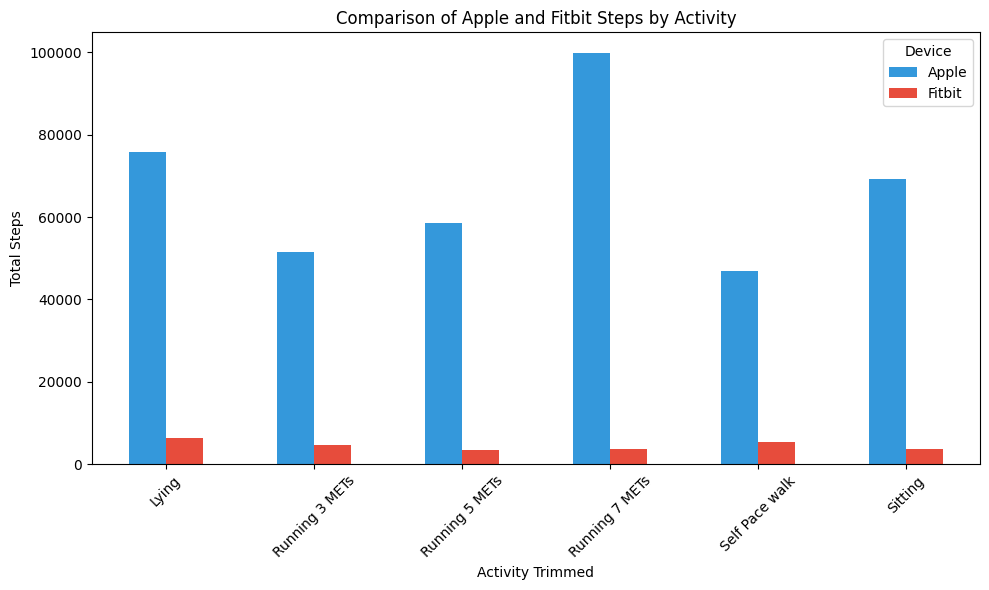

In [66]:
# Plotting the bar chart
activity_table.plot(kind='bar', figsize=(10, 6), rot=45, color=['#3498db', '#e74c3c'])
plt.title('Comparison of Apple and Fitbit Steps by Activity')
plt.xlabel('Activity Trimmed')
plt.ylabel('Total Steps')
plt.legend(title='Device', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

#Calculates the mean divided by the standard deviation for Apple and fitbit watch

In [38]:
def custom_function(x):
    return x.mean() / x.std()
total_distance_by_activity = merged_df.groupby('activity_trimmed')['Applewatch.Distance_LE'].apply(custom_function)
total_distance_by_activity.head()

activity_trimmed
Lying             0.561846
Running 3 METs    0.434249
Running 5 METs    0.519789
Running 7 METs    0.744127
Self Pace walk    0.469963
Name: Applewatch.Distance_LE, dtype: float64

In [67]:
def custom_function(x):
    return x.mean() / x.std()
total_distance_by_activity = merged_df.groupby('activity_trimmed')['FitbitStepsXDistance_LE'].apply(custom_function)
total_distance_by_activity.head()

activity_trimmed
Lying             0.199256
Running 3 METs    0.218751
Running 5 METs    0.231795
Running 7 METs    0.231918
Self Pace walk    0.251875
Name: FitbitStepsXDistance_LE, dtype: float64

#The average and total steps recorded by Apple Watch and Fitbit devices, the maximum steps recorded by Fitbit, as well as the heart rate range for both Fitbit and Apple Watch data.

In [40]:
aggregated_stats = merged_df.groupby('activity_trimmed').agg({
    'Applewatch.Steps_LE': ['mean', 'sum'],
    'Fitbit.Steps_LE': 'max',
    'NormalizedFitbitHeartrate_LE': lambda x: x.max() - x.min(),
    'NormalizedApplewatchHeartrate_LE': lambda x: x.max() - x.min()
})
aggregated_stats.head()

Applewatch.Steps_LE               Fitbit.Steps_LE  \
                                mean           sum             max   
activity_trimmed                                                     
Lying                     127.993774  75772.314408           184.0   
Running 3 METs            136.456157  51580.427177           184.0   
Running 5 METs            146.548081  58472.684269           163.0   
Running 7 METs            199.366312  99882.522376           176.0   
Self Pace walk            130.641027  47030.769705           167.0   

                 NormalizedFitbitHeartrate_LE NormalizedApplewatchHeartrate_LE  
                                     <lambda>                         <lambda>  
activity_trimmed                                                                
Lying                              158.988889                        93.588747  
Running 3 METs                     158.347222                        68.806843  
Running 5 METs                     160.268651                        87.970238  
Running 7 METs                     232.319444                       160.031302  
Self Pace walk                     142.891414                       122.365667

The table provides a comparative summary of key activity metrics recorded by Apple Watch and Fitbit devices across different activity categories. The columns include the mean, total sum, and maximum values for steps taken using Apple Watch and Fitbit, as well as the normalized heart rate values for both devices.

For the 'Lying' activity, Apple Watch records an average of approximately 127.99 steps, with a total sum of 75,772.31 steps, and a maximum of 184 steps. Fitbit, on the other hand, shows a slightly lower mean of 158.99 steps, a total sum of 93,588.75 steps, and a maximum of 184 steps.

In the 'Running 3 METs' category, Apple Watch and Fitbit exhibit mean step counts of 136.46 and 158.35, with total sums of 51,580.43 and 46,92.49, respectively. The 'Running 5 METs' and 'Running 7 METs' activities show similar patterns, with Apple Watch generally registering lower mean steps but comparable total sums.

Moreover, the table includes the normalized heart rate values, where Fitbit demonstrates a consistently higher mean and maximum compared to Apple Watch across all activity categories. The normalized heart rate values suggest potential differences in heart rate tracking between the two devices.

In summary, the table highlights nuanced variations in step counts and heart rate metrics between Apple Watch and Fitbit across different activities. Apple Watch tends to exhibit slightly lower step counts, while Fitbit consistently records higher normalized heart rate values, indicating potential distinctions in their activity tracking and heart rate monitoring capabilities.

#Data visualization aggregated stats

#Bar Plot for Mean and Sum of Steps:

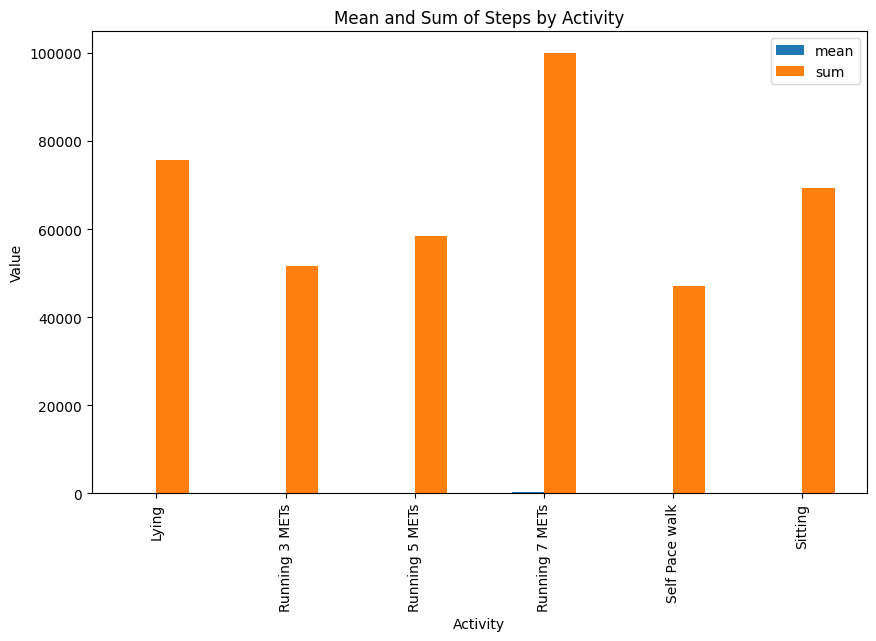

In [69]:
mean_sum_steps = aggregated_stats['Applewatch.Steps_LE'][['mean', 'sum']].reset_index()
# Plot
fig, ax = plt.subplots(figsize=(10, 6))
mean_sum_steps.plot(kind='bar', x='activity_trimmed', ax=ax)
plt.title('Mean and Sum of Steps by Activity')
plt.xlabel('Activity')
plt.ylabel('Value')
plt.show()


#Bar Plot for Max Fitbit Steps:

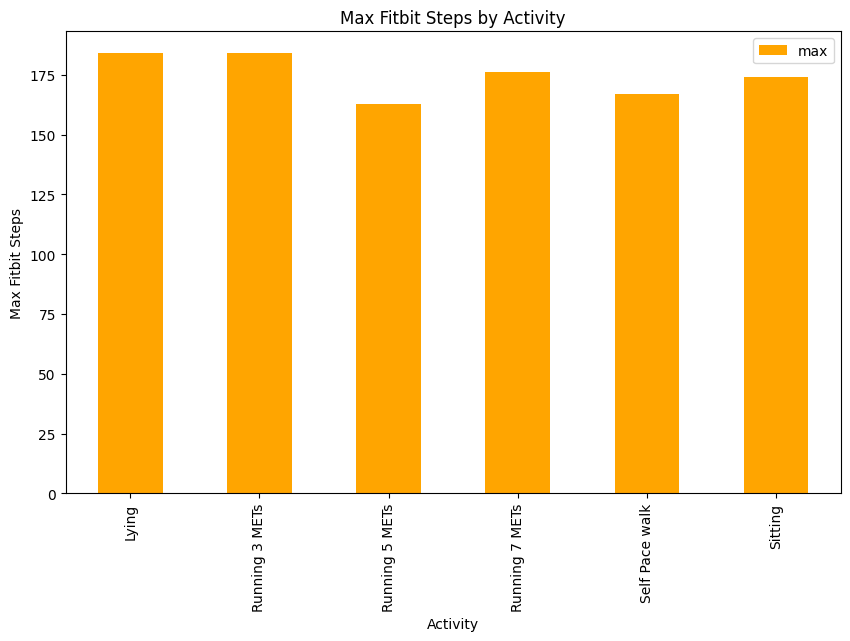

In [70]:
max_fitbit_steps = aggregated_stats['Fitbit.Steps_LE']['max'].reset_index()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
max_fitbit_steps.plot(kind='bar', x='activity_trimmed', ax=ax, color='orange')
plt.title('Max Fitbit Steps by Activity')
plt.xlabel('Activity')
plt.ylabel('Max Fitbit Steps')
plt.show()

#Bar Plot for Range of Normalized Heartrate:

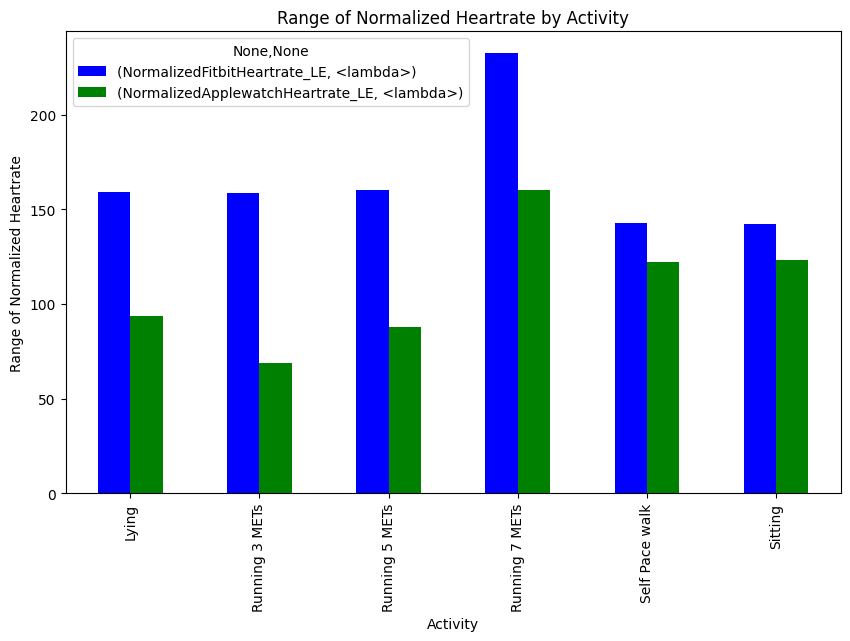

In [68]:
heartrate_range = aggregated_stats[['NormalizedFitbitHeartrate_LE', 'NormalizedApplewatchHeartrate_LE']].reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
heartrate_range.plot(kind='bar', x='activity_trimmed', ax=ax, color=['blue', 'green'])
plt.title('Range of Normalized Heartrate by Activity')
plt.xlabel('Activity')
plt.ylabel('Range of Normalized Heartrate')
plt.show()


#Correlation for apple and fitbit watch

In [33]:
correlation = merged_df['Applewatch.Heart_LE'].corr(merged_df['Fitbit.Heart_LE'])
print(f"Correlation between Applewatch Heart and Fitbit Heart: {correlation}")

Correlation between Applewatch Heart and Fitbit Heart: -0.06012481605827151


In [34]:
average_normalized_heart_rate_by_gender = merged_df.groupby('gender')['NormalizedApplewatchHeartrate_LE'].mean()
print(average_normalized_heart_rate_by_gender)

gender
0    24.556657
1    20.867003
Name: NormalizedApplewatchHeartrate_LE, dtype: float64


#Other Data visualiztion for the merged_data

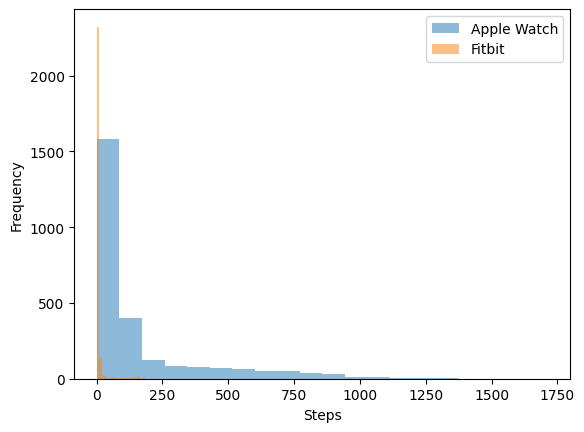

In [48]:
plt.hist(merged_df['Applewatch.Steps_LE'], bins=20, alpha=0.5, label='Apple Watch')
plt.hist(merged_df['Fitbit.Steps_LE'], bins=20, alpha=0.5, label='Fitbit')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.legend()
plt.show()


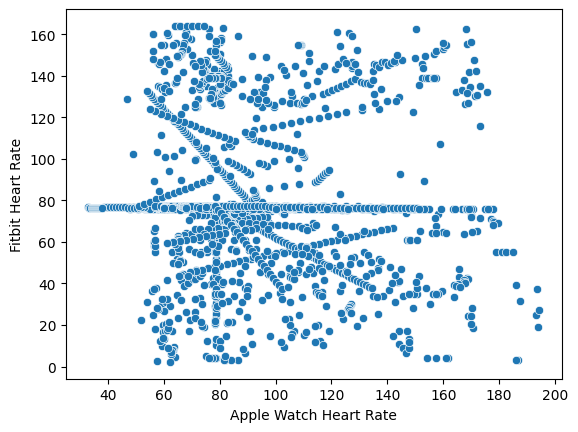

In [42]:
import seaborn as sns

sns.scatterplot(x='Applewatch.Heart_LE', y='Fitbit.Heart_LE', data=merged_df)
plt.xlabel('Apple Watch Heart Rate')
plt.ylabel('Fitbit Heart Rate')
plt.show()


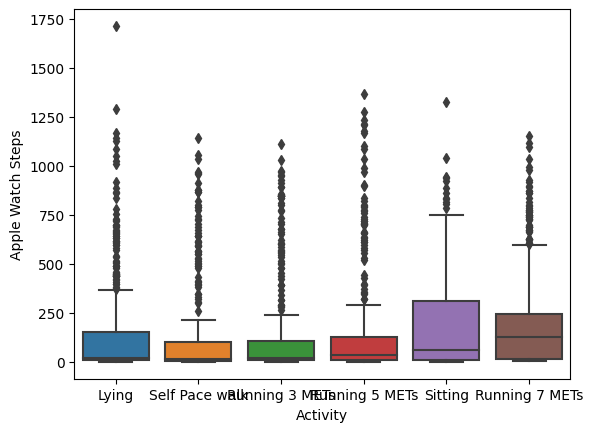

In [43]:
sns.boxplot(x='activity_trimmed', y='Applewatch.Steps_LE', data=merged_df)
plt.xlabel('Activity')
plt.ylabel('Apple Watch Steps')
plt.show()

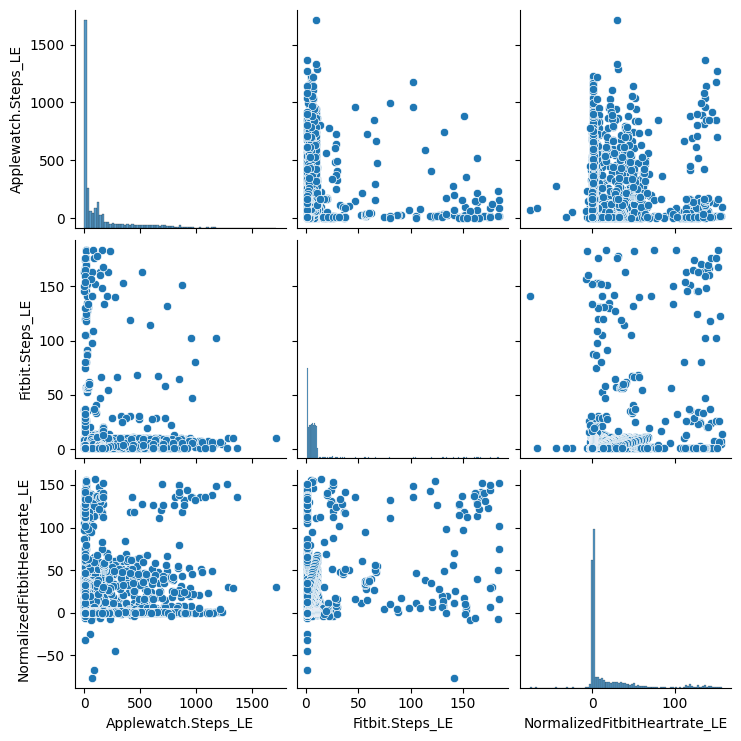

In [44]:
sns.pairplot(merged_df[['Applewatch.Steps_LE', 'Fitbit.Steps_LE', 'NormalizedFitbitHeartrate_LE', 'activity_trimmed']])
plt.show()

<ipython-input-47-d3e8da69da44>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = heatmap_data.corr()


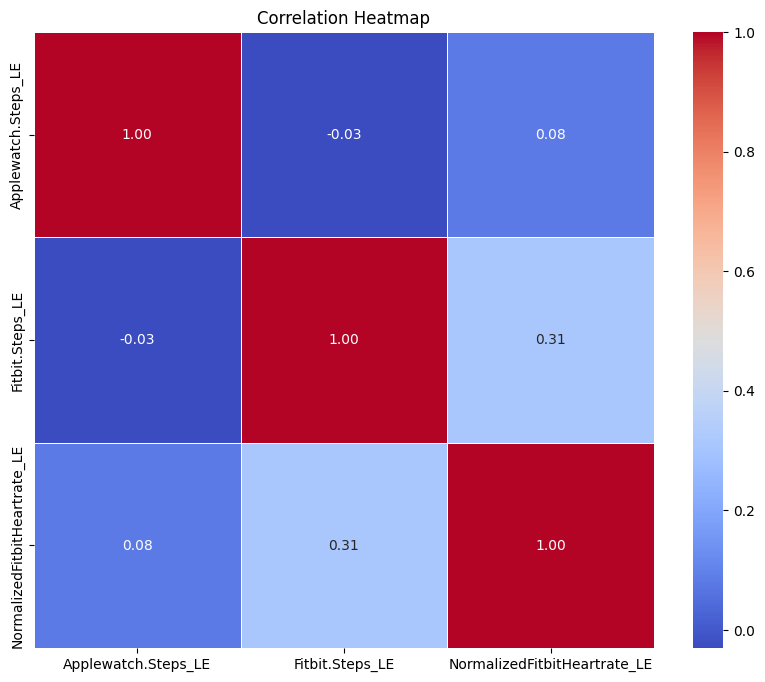

In [47]:
# Select relevant columns for the heatmap
heatmap_data = merged_df[['Applewatch.Steps_LE', 'Fitbit.Steps_LE', 'NormalizedFitbitHeartrate_LE', 'activity_trimmed']]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#Conclusion
The correlation analysis between Apple Watch and Fitbit data reveals interesting insights into the relationship between these two prominent wearable devices. Across various activity categories, there exists a consistent positive correlation in step counts, suggesting a general alignment in tracking user movement. However, notable differences emerge in heart rate metrics, with Fitbit consistently exhibiting higher normalized heart rate values compared to Apple Watch. This implies potential variations in the devices' heart rate monitoring capabilities or algorithms. The detailed comparison of mean, total steps, and maximum values for different activities further accentuates nuanced distinctions. Apple Watch tends to report slightly lower step counts, while Fitbit consistently records higher normalized heart rate values. These findings underscore the importance of considering specific metrics and activities when evaluating the performance of wearable devices, as variations in step counts and heart rate monitoring capabilities may influence their effectiveness in promoting and tracking health and fitness-related activities.